In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
data_1 = pd.read_csv('data_2d.csv')
data_1.info()
data_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [51]:
data_2 = pd.read_csv('mnist.csv')
data_2.info()
data_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(199, 2)


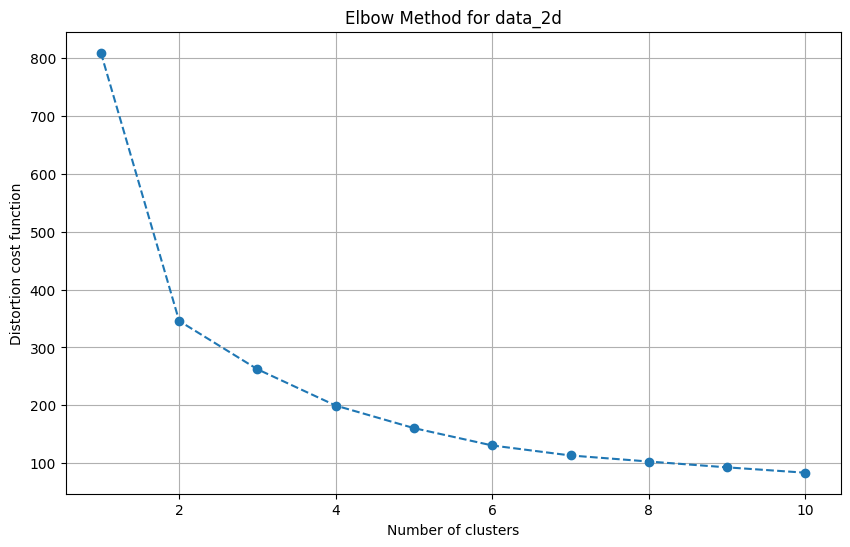

In [52]:
X_2d = data_1.iloc[:, 1:]

print(X_2d.shape)
# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)
# Візуалізація ліктевого графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

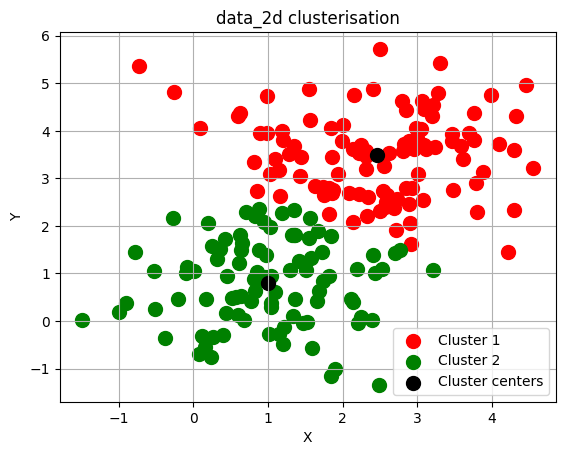

In [93]:
kmeans =KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)


x = np.array(data_1)
x = x[:, 1:]

y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Cluster centers')
plt.title("data_2d clusterisation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()

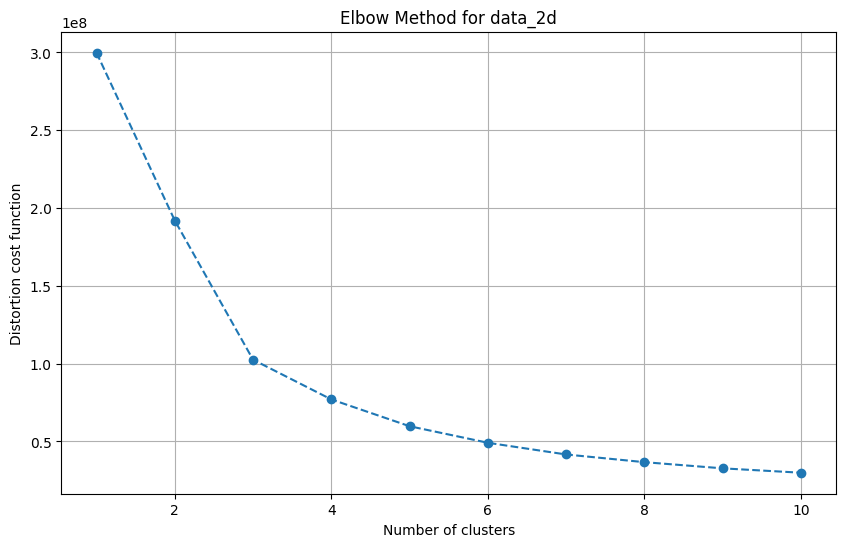

In [96]:
from sklearn.decomposition import PCA

X_2d = data_2.iloc[:, 1:]

pca = PCA(n_components=2)

pca.fit(X_2d)

X = pca.fit_transform(X_2d)

#Застосування ліктевого методу для визначення оптимальної кількості кластерів

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss_2d.append(kmeans.inertia_)
# Візуалізація ліктевого графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

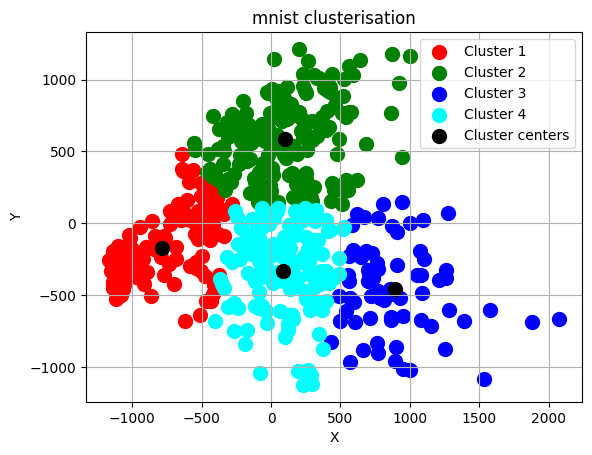

In [103]:
kmeans =KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)


x = np.array(data_2)
x = x[:, 1:]

pca.fit(x)

x = pca.fit_transform(x)

y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='blue', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Cluster centers')
plt.title("mnist clusterisation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()